In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.dummy import DummyRegressor

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../../Jian/FE v5/covid_19_patient_features_v5.csv')

In [3]:
df.set_index('patient_no', inplace=True, drop=True)

In [4]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df.replace("<", "", inplace=True)
df.replace(">", "", inplace=True)

In [6]:
df.astype('float64', copy=True, errors='ignore')

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,HSCRP,DD,TT,FIB,APTT,INR,PT,AT3,BCF8,PS,PC,FDP,ALG,ALB,ALP,ALT,AST,BUN,U,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,LAP,5NT,HC,SAA,SdLDL,CHE,AFU,LPA,APOA1,APOB,IBIL,FDG,LPS,LAC,BNP,SA,CD3+,CD4+,CD8+,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,C1q,C3,C4,IGM,IGA,IGG,ASO,RF,UALB,SQEP,NSEC,HYAL,UNCC,BYST,MS-U,UNCX,URBC,UWBC,SG,PH,WBCC,BACT
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,Union,81.0,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.00,1.13,0.30,3.10,8.70,41.2,46.70,17.2,39.3,12.5,3.94,2.42,22.00,15.40,<0.13,NaN,1.26,17.20,4.46,38.50,1.11,14.1,NaN,NaN,NaN,NaN,NaN,1.2,34.7,52.0,63.00,44.00,6.96,NaN,2.08,101.8,29.9,74.3,21.0,29.0,4.15,0.94,141.1,0.97,9.8,63.7,273.8,4.01,232.00,0.64,299.0,0.72,9.0,4.1,4.82,2.92,302.3,0.13,0.7,215.0,0.89,25.0,6.0,6.60,155.8,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 2,Union,50.0,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,31.5,90.2,41.5,145.0,12.6,0.14,10.5,134.0,0.00,0.00,0.09,0.66,1.20,0.00,0.00,4.60,33.8,61.60,29.7,41.9,12.6,4.60,1.95,18.00,39.00,0.15,NaN,0.35,18.50,4.82,43.70,0.91,12.0,NaN,NaN,NaN,NaN,NaN,1.6,40.9,36.0,50.00,45.00,4.05,NaN,2.29,99.9,17.2,75.1,49.0,25.9,4.32,0.81,138.2,1.32,9.5,66.8,342.3,3.21,102.00,0.92,392.0,0.77,21.0,3.2,6.63,1.89,295.7,0.15,3.2,284.0,0.75,29.0,9.0,7.10,204.5,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,2.10,4.87,8.08,2.13,2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.40,0.10,7.50,16.9,75.10,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.00,63.00,6.07,NaN,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.60,0.00,5.80,13.9,79.70,16.3,40.0,12.7,4.48,5.25,19.00,66.40,<0.13,NaN,1.70,19.10,4.77,38.80,0.94,12.4,NaN,NaN,NaN,NaN,NaN,1.2,31.7,66.0,35.00,47.00,6.63,NaN,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,28.0,8.0,5.70,662.0,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.10,0.00,5.90,22.4,71.60,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.

In [7]:
df['TT'].str.replace(">", "")

patient_no
Patient 1       17.20
Patient 2       18.50
Patient 3         NaN
Patient 4       19.10
Patient 5         NaN
                ...  
Patient 1517    19.50
Patient 1518      NaN
Patient 1519      NaN
Patient 1520      NaN
Patient 1521      NaN
Name: TT, Length: 1521, dtype: object

In [8]:
for c in df.columns:
    if df[c].dtype  == 'object' or  df[c].dtype  =='O':
        try:
            df[c] = df[c].str.replace(">", "").astype(float)
            df[c] = df[c].str.replace("<", "").astype(float)
        except: ValueError

In [9]:
df = df.astype('float64', copy=True, errors='ignore')

In [10]:
df['TT']['Patient 686']

240.0

In [11]:
#df['TT'] = df['TT'].str.replace(">", "")

In [12]:
#df['TT'].astype('float64', copy=True, errors='raise')

C1q                          object
C3                           object
C4                           object

In [13]:
df.drop(columns=['C1q', 'C3', 'C4'], inplace=True)

In [14]:
df.dtypes

Hospital                object
Age                    float64
Gender                  object
Body_temperature       float64
Underlying_diseases     object
                        ...   
UWBC                   float64
SG                     float64
PH                     float64
WBCC                   float64
BACT                   float64
Length: 129, dtype: object

In [15]:
round(df.isnull().sum() / len(df) * 100, 2)

Hospital                0.00
Age                     0.00
Gender                  0.00
Body_temperature        9.99
Underlying_diseases     0.00
                       ...  
UWBC                   95.92
SG                     96.32
PH                     96.84
WBCC                   99.67
BACT                   97.04
Length: 129, dtype: float64

In [16]:
percent_null = round(df.isnull().sum() /len(df) * 100, 2)

In [17]:
 df_filtered = df.drop(columns=percent_null[percent_null > 80].index.to_list())

In [18]:
df_filtered.head(20)

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,APTT,INR,PT,ALG,ALB,ALP,ALT,AST,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,Union,81.0,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.00,1.13,0.3,3.1,8.7,41.2,46.7,17.2,39.3,12.5,3.94,2.42,22.0,15.40,<0.13,1.26,17.2,4.46,38.5,1.11,14.1,1.2,34.7,52.0,63.00,44.00,6.96,2.08,101.8,29.9,74.3,21.0,29.0,4.15,0.94,141.1,0.97,9.8,63.7,273.8,4.01,232.00,0.64,299.0,0.72,9.0,4.1,4.82,2.92,302.3,0.13,0.7,215.0,0.89,6.60,155.8,1.10,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75
Patient 2,Union,50.0,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,31.5,90.2,41.5,145.0,12.6,0.14,10.5,134.0,0.00,0.00,0.09,0.66,1.20,0.0,0.0,4.6,33.8,61.6,29.7,41.9,12.6,4.60,1.95,18.0,39.00,0.15,0.35,18.5,4.82,43.7,0.91,12.0,1.6,40.9,36.0,50.00,45.00,4.05,2.29,99.9,17.2,75.1,49.0,25.9,4.32,0.81,138.2,1.32,9.5,66.8,342.3,3.21,102.00,0.92,392.0,0.77,21.0,3.2,6.63,1.89,295.7,0.15,3.2,284.0,0.75,7.10,204.5,0.38,NaN,NaN,NaN,2.70,2.10,4.87,8.08,2.13,2.44
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.4,0.1,7.5,16.9,75.1,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.00,63.00,6.07,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.6,0.0,5.8,13.9,79.7,16.3,40.0,12.7,4.48,5.25,19.0,66.40,<0.13,1.70,19.1,4.77,38.8,0.94,12.4,1.2,31.7,66.0,35.00,47.00,6.63,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,5.70,662.0,0.57,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.1,0.0,5.9,22.4,71.6,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 6,Union,61.0,Female,37.6,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured,348.0,31.4,90.5,35.1,122.0,16.4,0.28,12.3,230.0,0.02,0.03,0.57,1.35,4.39,0.3,0.5,9.0,21.2,69.0,42.0,40.3,12.3,3.88,6.36,102.0,136.00,<0.13,0.83,NaN,NaN,NaN,NaN,NaN,1.2,38.3,65.0,17.00,20.00,4.04,2.10,93.5,27.6,49.3,36.0,31.0,4.22,0.73,138.5,0.90,10.7,69.3,269.8,NaN,40.00,NaN,283.0,NaN,17.0,4.5,14.08,NaN,303.6,0.11,0.7,NaN,NaN,NaN,NaN,NaN,11.00,19.61,1.24,2.63,1.53,24.13,4.70,2.03,1.63
Patient 7,Union,23.0,Female,38.7,No,Positive,NaN,Regular,Unknown,346.0,32.2,93.1,29.5,102.0,12.6,0.11,10.3,111.0,0.00,0.00,0.75,1.18,10.16,0.0,0.0,6.2,9.8,84.0,28.6,46.5,13.6,3.17,12.09,NaN,63.30,NaN,NaN,17.2,3.14,53.1,1.01,13.1,0.9,22.6,110.0,17.00,39.00,2.27,2.01,105.9,19.7,54.3,11.0,24.7,3.84,0.58,133.7,1.60,13.8,47.3,350.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 8,Union,41.0,Female,36.5,No,Positive,Positive,Regular,Cured,332.0,30.2,90.8,39.4,131.0,15.8,0.17,12.3,140.0,0.01,0.00,0.34,1.21,1.36,0.3,0.0,11.6,41.4,46.7,43.6,41.5,12.4,4.34,2.92,6.0,NaN,<0.13,0.51,16.4,3.58,39.5,0.96,12.6,1.8,41.5,42.0,16.0

In [19]:
df_filtered.shape

(1521, 87)

In [20]:
df['Morbidity'].unique()

array(['Regular', 'Severe', 'Critically ill',
       'Suspected (COVID-19-confirmed later)', 'Mild', 'Suspected',
       'Control', 'Control (Community-acquired pneumonia)'], dtype=object)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## Morbidity plot from dataframe

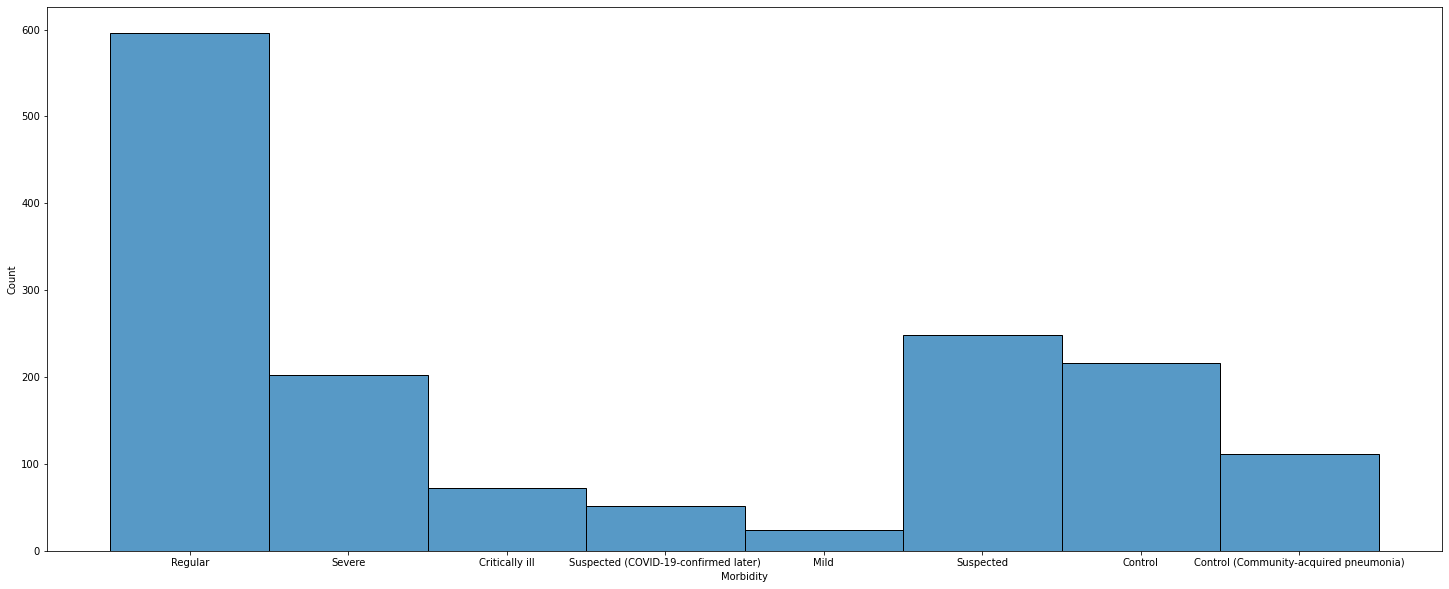

In [22]:
plt.figure(figsize=(25,10))
sns.histplot(df['Morbidity'])
plt.show()

Regular category is too high, unbalanced data.
Will reduce by half.

Checking proportion of Covid19 postive vs negative case for all patient in the Morbitidy column

In [23]:
pd.crosstab(df_filtered['Morbidity'], df_filtered['SARS-CoV-2_nucleic_acids'])

SARS-CoV-2_nucleic_acids,Negative,Negative; Positive (Confirmed later),Positive
Morbidity,,,
Control,216,0,0
Control (Community-acquired pneumonia),112,0,0
Critically ill,0,0,72
Mild,0,0,24
Regular,0,0,596
Severe,0,0,202
Suspected,248,0,0
Suspected (COVID-19-confirmed later),0,51,0


We will drop all 'suspected' (248 patients) because they are negative as well as the 'Suspected (COVID-19-confirmed later)' that turned out positive, because we do not have any detail on the morbidity status (51 patients)

In [24]:
# dropping all suspected cases categories

In [25]:
df_filtered.drop(df_filtered[df_filtered['Morbidity'] ==  'Suspected (COVID-19-confirmed later)'].index, inplace=True)

In [26]:
df_filtered.drop(df_filtered[df_filtered['Morbidity'] ==  'Suspected'].index, inplace=True)

In [27]:
morbidity_sampled = df_filtered[df_filtered['Morbidity'] == 'Regular'].sample(n=300, replace=False, weights=None, random_state=0, axis=None)

In [28]:
morbidity_sampled

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,APTT,INR,PT,ALG,ALB,ALP,ALT,AST,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1070,Liyuan,24.0,Male,36.5,No,Positive,Positive,Regular,Cured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 288,Union,30.0,Male,39.0,"Hypertension, Hyperuricemia",Positive,Positive,Regular,Cured,338.0,31.1,92.2,39.2,132.0,16.2,0.20,9.3,214.0,0.01,0.01,0.31,2.52,2.19,0.20,0.10,6.20,50.1,43.40,NaN,NaN,NaN,4.25,5.04,NaN,NaN,NaN,0.28,14.7,6.16,33.9,0.84,11.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 440,Union,54.0,Male,38.3,"Fatty liver, Hyperlipoidemia, Renal calculi",Positive,Positive,Regular,Cured,330.0,28.1,85.3,36.7,121.0,16.3,0.24,8.8,269.0,0.02,0.09,0.55,0.83,3.54,0.40,1.80,11.00,16.6,70.20,18.7,36.8,12.5,4.31,5.03,NaN,120.00,<0.13,2.08,17.4,7.95,35.1,1.12,14.2,1.1,31.9,43.0,88.00,45.00,3.11,2.12,99.4,23.5,78.3,77.0,27.9,3.46,1.12,138.9,1.18,13.0,59.8,263.5,3.35,127.00,0.68,299.0,1.04,16.0,5.0,5.42,2.16,293.3,0.11,1.9,181.0,0.84,6.00,701.0,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 493,Union,66.0,Male,38.0,No,Positive,Positive,Regular,Cured,341.0,35.5,104.0,41.2,141.0,16.4,0.23,7.1,326.0,0.02,0.08,0.66,2.23,3.58,0.36,1.25,10.08,33.9,54.44,NaN,NaN,12.1,3.96,6.58,19.0,21.00,<0.13,0.20,18.1,3.67,38.5,1.02,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14,2.53,1.90,3.63,2.43,7.91,1.73
Patient 161,Union,32.0,Female,38.9,No,Positive,Positive,Regular,Cured,324.0,29.4,90.8,37.3,121.0,11.1,0.13,9.7,136.0,0.01,0.01,0.33,1.17,2.77,0.20,0.20,7.70,27.3,64.60,22.9,43.3,12.9,4.11,4.29,NaN,3.17,0.18,NaN,NaN,NaN,NaN,NaN,NaN,1.5,40.0,67.0,16.00,24.00,2.19,2.18,102.3,23.4,59.2,18.0,27.0,4.59,0.84,138.5,0.93,3.5,67.0,180.6,NaN,NaN,NaN,NaN,NaN,13.0,0.8,NaN,NaN,NaN,0.19,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.34,1.67,3.15,2.94,1.83,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 579,Union,71.0,Female,37.4,Hypertension,Positive,Positive,Regular,Cured,342.0,32.4,94.8,32.7,112.0,16.4,0.11,8.7,132.0,0.01,0.00,0.34,0.98,1.89,0.35,0.06,10.46,30.6,58.57,NaN,NaN,13.0,3.45,3.22,8.0,<3.14,<0.13,1.41,17.2,2.50,34.2,0.96,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.76,2.40,2.16,10.86,3.38,3.67,2.04
Patient 456,Union,56.0,Male,36.2,No,Positive,Positive,Regular,Cured,348.0,31.9,91.8,43.7,152.0,17.3,0.15,12.6,120.0,0.01,0.03,0.57,1.01,2.43,0.20,0.70,14.10,24.9,60.10,44.6,38.9,11.6,4.76,4.05,29.0,8.83,<0.13,0.42,17.6,5.95,37.6,1.02,13.2,1.8,37.4,78.0,41.00,32.00,5.98,2.14,98.9,27.7,85.2,29.0,20.7,4.72,0.80,139.0,1.06,8.8,58.1,249.3,3.80,32.00,0.57,343.0,2.24,12.0,3.2,9.75,2.34,303.2,0.17,1.2,241.0,0.81,15.90,28.1,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 1321,Union,32.0,Male,39.9,Aft

In [29]:
df2 = df_filtered[~df_filtered.index.isin(morbidity_sampled.index)]

In [30]:
df2

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,APTT,INR,PT,ALG,ALB,ALP,ALT,AST,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.40,0.10,7.50,16.9,75.10,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.00,63.00,6.07,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.60,0.00,5.80,13.9,79.70,16.3,40.0,12.7,4.48,5.25,19.0,66.40,<0.13,1.70,19.1,4.77,38.8,0.94,12.4,1.2,31.7,66.0,35.00,47.00,6.63,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,5.70,662.0,0.57,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.10,0.00,5.90,22.4,71.60,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 6,Union,61.0,Female,37.6,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured,348.0,31.4,90.5,35.1,122.0,16.4,0.28,12.3,230.0,0.02,0.03,0.57,1.35,4.39,0.30,0.50,9.00,21.2,69.00,42.0,40.3,12.3,3.88,6.36,102.0,136.00,<0.13,0.83,NaN,NaN,NaN,NaN,NaN,1.2,38.3,65.0,17.00,20.00,4.04,2.10,93.5,27.6,49.3,36.0,31.0,4.22,0.73,138.5,0.90,10.7,69.3,269.8,NaN,40.00,NaN,283.0,NaN,17.0,4.5,14.08,NaN,303.6,0.11,0.7,NaN,NaN,NaN,NaN,NaN,11.00,19.61,1.24,2.63,1.53,24.13,4.70,2.03,1.63
Patient 7,Union,23.0,Female,38.7,No,Positive,NaN,Regular,Unknown,346.0,32.2,93.1,29.5,102.0,12.6,0.11,10.3,111.0,0.00,0.00,0.75,1.18,10.16,0.00,0.00,6.20,9.8,84.00,28.6,46.5,13.6,3.17,12.09,NaN,63.30,NaN,NaN,17.2,3.14,53.1,1.01,13.1,0.9,22.6,110.0,17.00,39.00,2.27,2.01,105.9,19.7,54.3,11.0,24.7,3.84,0.58,133.7,1.60,13.8,47.3,350.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1514,Union,60.0,Male,36.5,Postoperative cerebral aneurysm,Negative,Negative,Control,Unknown,316.0,31.9,100.7,29.7,94.0,10.6,0.21,9.9,210.0,0.01,0.00,0.21,1.34,3.61,0.20,0.00,4.10,25.9,69.80,23.7,58.4,15.9,2.95,5.17,116.0,92.80,<0.13,0.79,17.8,6.27,44.3,1.10,14.0,1.0,29.1,128.0,22.00,7.00,8.29,2.33,99.7,27.6,60.4,129.0,29.3,4.02,0.96,140.7,1.40,3.9,58.4,216.4,5.15,9.00,1.10,176.0,1.19,13.0,1.4,6.67,3.38,304.4,0.18,7.0,133.0,1.01,16.40,415.9,1.07,NaN,NaN,NaN,3.34,3.48,3.76,4.17,3.51,3.24
Patient 1515,Union,53.0,Female,38.0,"Chronic renal failure, ANCA-associated glomeru...",Negative,Negative,Control,Unknown,321.0,29.3,91.5,23.7,76.0,10.9,0.18,10.2,176.0,0.00,0.01,0.16,0.36,6.29,0.00,0.10,2.30,5.3,92.30,26.0,49.4,14.8,2.59,6.82,NaN,49.40,0.49,1.92,17.9,4.55,43.6,1.04,13.4,1.7,29.5,41.0,11.00,25.00,39.37,2.13,104.

## Morbidity plot with filtered dataframe

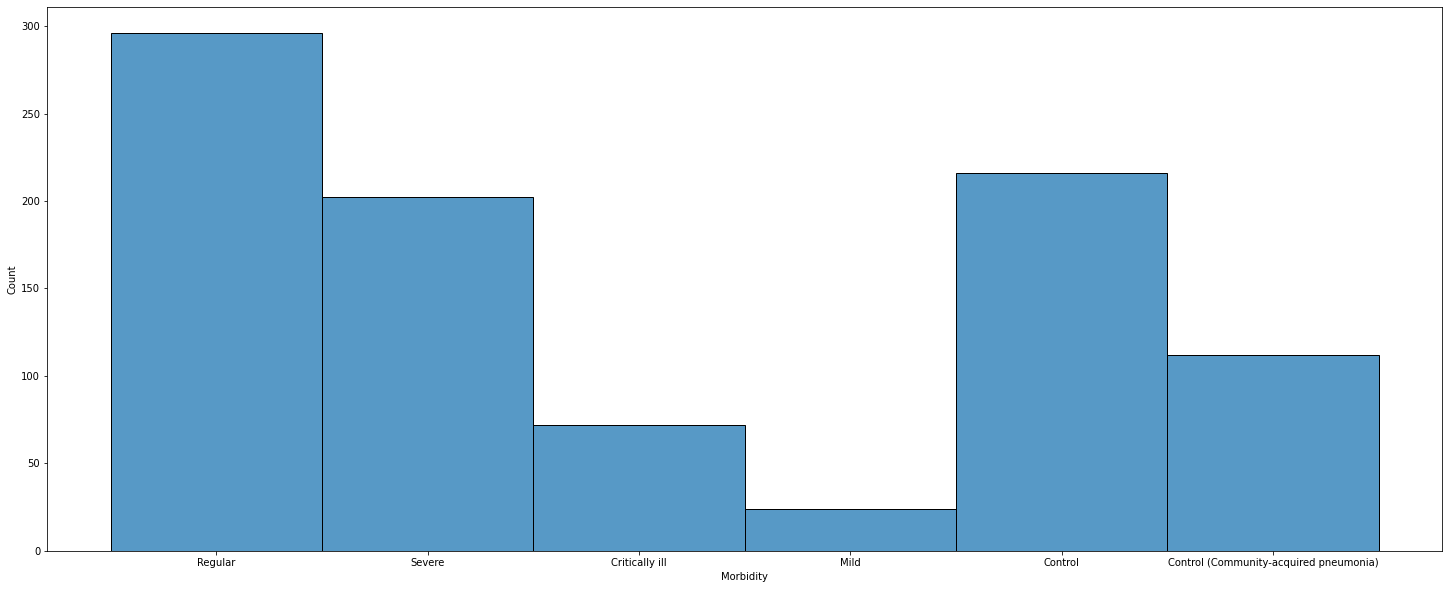

In [47]:
plt.figure(figsize=(25,10))
sns.histplot(df2['Morbidity'])
plt.show()

In [31]:
#patient ids and target group /cured / desceased

In [32]:
df2['target']=np.where(df2['SARS-CoV-2_nucleic_acids']=='Negative', 0, np.where(df2['Morbidity'].isin(['Severe','Critically ill']) , 2, 1))

<ipython-input-32-8cadd74f996b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target']=np.where(df2['SARS-CoV-2_nucleic_acids']=='Negative', 0, np.where(df2['Morbidity'].isin(['Severe','Critically ill']) , 2, 1))


In [33]:
df2

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,APTT,INR,PT,ALG,ALB,ALP,ALT,AST,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,target
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.40,0.10,7.50,16.9,75.10,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.00,63.00,6.07,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.60,0.00,5.80,13.9,79.70,16.3,40.0,12.7,4.48,5.25,19.0,66.40,<0.13,1.70,19.1,4.77,38.8,0.94,12.4,1.2,31.7,66.0,35.00,47.00,6.63,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,5.70,662.0,0.57,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07,2
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.10,0.00,5.90,22.4,71.60,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Patient 6,Union,61.0,Female,37.6,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured,348.0,31.4,90.5,35.1,122.0,16.4,0.28,12.3,230.0,0.02,0.03,0.57,1.35,4.39,0.30,0.50,9.00,21.2,69.00,42.0,40.3,12.3,3.88,6.36,102.0,136.00,<0.13,0.83,NaN,NaN,NaN,NaN,NaN,1.2,38.3,65.0,17.00,20.00,4.04,2.10,93.5,27.6,49.3,36.0,31.0,4.22,0.73,138.5,0.90,10.7,69.3,269.8,NaN,40.00,NaN,283.0,NaN,17.0,4.5,14.08,NaN,303.6,0.11,0.7,NaN,NaN,NaN,NaN,NaN,11.00,19.61,1.24,2.63,1.53,24.13,4.70,2.03,1.63,2
Patient 7,Union,23.0,Female,38.7,No,Positive,NaN,Regular,Unknown,346.0,32.2,93.1,29.5,102.0,12.6,0.11,10.3,111.0,0.00,0.00,0.75,1.18,10.16,0.00,0.00,6.20,9.8,84.00,28.6,46.5,13.6,3.17,12.09,NaN,63.30,NaN,NaN,17.2,3.14,53.1,1.01,13.1,0.9,22.6,110.0,17.00,39.00,2.27,2.01,105.9,19.7,54.3,11.0,24.7,3.84,0.58,133.7,1.60,13.8,47.3,350.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1514,Union,60.0,Male,36.5,Postoperative cerebral aneurysm,Negative,Negative,Control,Unknown,316.0,31.9,100.7,29.7,94.0,10.6,0.21,9.9,210.0,0.01,0.00,0.21,1.34,3.61,0.20,0.00,4.10,25.9,69.80,23.7,58.4,15.9,2.95,5.17,116.0,92.80,<0.13,0.79,17.8,6.27,44.3,1.10,14.0,1.0,29.1,128.0,22.00,7.00,8.29,2.33,99.7,27.6,60.4,129.0,29.3,4.02,0.96,140.7,1.40,3.9,58.4,216.4,5.15,9.00,1.10,176.0,1.19,13.0,1.4,6.67,3.38,304.4,0.18,7.0,133.0,1.01,16.40,415.9,1.07,NaN,NaN,NaN,3.34,3.48,3.76,4.17,3.51,3.24,0
Patient 1515,Union,53.0,Female,38.0,"Chronic renal failure, ANCA-associated glomeru...",Negative,Negative,Control,Unknown,321.0,29.3,91.5,23.7,76.0,10.9,0.18,10.2,176.0,0.00,0.01,0.16,0.36,6.29,0.00,0.10,2.30,5.3,92.30,26.0,49.4,14.8,2.59,6.82,NaN,49.40,0.49,1.92,17.9,4.55,43.6,1.04,13.4,1.7,29.5,41.0,11.

In [34]:
#df2.to_csv('df2.csv')

In [35]:
# For target checking for n patients

In [36]:
# patients_list = [range(1,922)]
# patient_list_target = []

# for patient in patients_list:
#     target_result = df2['target'].values[patient]
#     patient_list_target.append(target_result)

In [37]:
df2.columns

Index(['Hospital', 'Age', 'Gender', 'Body_temperature', 'Underlying_diseases',
       'SARS-CoV-2_nucleic_acids', 'CT', 'Morbidity', 'Mortality', 'MCHC',
       'MCH', 'MCV', 'HCT', 'HGB', 'PDW', 'PLCT', 'MPV', 'PLT', 'BA', 'EO',
       'MO', 'LY', 'NE', 'BAP', 'EOP', 'MOP', 'LYP', 'NEP', 'PLCR', 'RDWSD',
       'RDWCV', 'RBC', 'WBC', 'ESR', 'CRP', 'PCT', 'DD', 'TT', 'FIB', 'APTT',
       'INR', 'PT', 'ALG', 'ALB', 'ALP', 'ALT', 'AST', 'BUN', 'CA', 'CL',
       'CO2', 'CREA', 'GGT', 'GLB', 'K', 'MG', 'Na', 'PHOS', 'TBIL', 'TP',
       'URIC', 'CHOL', 'CK', 'HDLC', 'LDH', 'TG', 'AnG', 'DBIL', 'GLU', 'LDLC',
       'OSM', 'PA', 'TBA', 'HBDH', 'CysC', 'HC', 'SAA', 'SdLDL', 'BC', 'NKC',
       'CD4/CD8', 'IL-2', 'IL-4', 'IL-6', 'IL-10', 'TNF', 'IFN', 'target'],
      dtype='object')

In [38]:
for c in ['Age', 'Body_temperature',
       'MCHC',
       'MCH', 'MCV', 'HCT', 'HGB', 'PDW', 'PLCT', 'MPV', 'PLT', 'BA', 'EO',
       'MO', 'LY', 'NE', 'BAP', 'EOP', 'MOP', 'LYP', 'NEP', 'PLCR', 'RDWSD',
       'RDWCV', 'RBC', 'WBC', 'ESR', 'CRP', 'PCT', 'DD', 'TT', 'FIB', 'APTT',
       'INR', 'PT', 'ALG', 'ALB', 'ALP', 'ALT', 'AST', 'BUN', 'CA', 'CL',
       'CO2', 'CREA', 'GGT', 'GLB', 'K', 'MG', 'Na', 'PHOS', 'TBIL', 'TP',
       'URIC', 'CHOL', 'CK', 'HDLC', 'LDH', 'TG', 'AnG', 'DBIL', 'GLU', 'LDLC',
       'OSM', 'PA', 'TBA', 'HBDH', 'CysC', 'HC', 'SAA', 'SdLDL', 'BC', 'NKC',
       'CD4/CD8', 'IL-2', 'IL-4', 'IL-6', 'IL-10', 'TNF', 'IFN']:
    if df2[c].dtype  == 'object':
        try:
            df2[c] = df2[c].str.replace(">", "")
            df2[c] = df2[c].str.replace("<", "")
            df2[c] = pd.to_numeric(df2[c], errors='coerce').astype('float64')
        except: ValueError

<ipython-input-38-7068aca205d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = df2[c].str.replace(">", "")
<ipython-input-38-7068aca205d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = df2[c].str.replace("<", "")
<ipython-input-38-7068aca205d3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [50]:
#df2.dtypes

In [51]:
df2.select_dtypes(include='object')

,Hospital,Gender,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality
patient_no,,,,,,,
Patient 3,Union,Female,Postoperative cervical cancer,Positive,Positive,Regular,Cured
Patient 4,Union,Male,Aorta calcification,Positive,Positive,Severe,Cured
Patient 5,Union,Female,No,Positive,Positive,Severe,Cured
Patient 6,Union,Female,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured
Patient 7,Union,Female,No,Positive,NaN,Regular,Unknown
...,...,...,...,...,...,...,...
Patient 1514,Union,Male,Postoperative cerebral aneurysm,Negative,Negative,Control,Unknown
Patient 1515,Union,Female,"Chronic renal failure, ANCA-associated glomeru...",Negative,Negative,Control,Unknown
Patient 1516,Union,Male,No,Positive,Positive,Severe,Cured


## Pipeline

### Preprocessing

In [42]:
#X.select_dtypes(include='float64', exclude=None)

In [43]:
X = df2.drop(columns = ['SARS-CoV-2_nucleic_acids', 'Underlying_diseases', 'Morbidity', 'Mortality', 'Gender', 'Hospital', 'CT', 'target'])
y = df2['target']

model = LogisticRegression()

num_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('inputer_object', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_include="float64")),
    ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object', 'O']))],
     remainder='passthrough')
    

X_preproc = pd.DataFrame(preprocessor.fit_transform(X))

In [44]:
X_preproc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0.576714,0.716153,-0.473129,0.139209,0.427050,-1.013878,-1.020087,0.424085,-0.044442,0.306916,-0.302963,-0.033196,-0.696798,-0.471162,-0.582862,-0.539112,0.204942,-0.680028,-0.028988,-0.472279,0.486243,4.467419e-16,0.000000,0.000000,-1.098300,-0.749747,-4.379364e-16,-9.183779e-01,0.000000,0.000000,0.000000,0.000000,8.989875e-16,0.000000,7.592237e-16,-6.026828e-01,-0.973790,-0.811636,2.222144e-01,0.315534,-0.187593,-1.939277e+00,0.651703,-0.337998,-0.274396,-0.529396,0.764162,-7.459891e-01,0.318172,8.303958e-01,-0.239528,-0.582940,-2.017020e-01,0.154013,1.027681e+00,-0.270177,-1.065153e+00,-5.196218e-02,2.291481e+00,3.156716e-02,-0.433267,0.280702,-0.009701,0.898068,-4.396274e-01,-2.937145e-01,2.978651e-01,-0.256991,-9.779151e-01,0.000000,5.827712e-16,-9.254751e-16,0.000000,4.278445e-16,-2.179065e-15,0.000000,0.000000,2.134991e-16,1.255463e-16,0.000000
1,1.037136,0.716153,0.170331,-0.047905,-0.107253,0.771686,0.780578,0.366839,-0.024605,-0.467505,0.699883,0.327148,-0.696798,-0.471162,-0.535860,-0.179209,0.748445,-0.735438,-0.428606,-0.708932,0.794942,-1.745987e+00,-0.924437,-0.551279,0.748554,-0.399629,-1.283265e+00,6.485610e-01,-0.258033,-0.081205,0.646305,0.559974,8.822347e-02,-0.514762,-5.181097e-01,-2.207368e-01,-0.661231,-0.293055,-1.211409e-01,0.064510,-0.082791,-1.326248e-01,-0.626923,-0.760429,-0.164660,0.184418,-0.318102,1.553359e+00,-0.483088,-5.107481e-01,-1.235811,-0.325102,-8.399199e-01,-0.356507,-6.547959e-01,-0.254046,2.293344e-01,7.044869e-01,-2.334718e-01,7.938555e-01,-0.249540,-0.174762,-0.190176,-0.588734,-4.411541e-01,-1.518708e-01,2.107844e+00,-0.289510,-1.521474e+00,4.659547,-1.463800e+00,3.445252e+00,0.973008,7.763259e-01,-7.744347e-01,-0.056796,0.669504,3.262594e-01,-3.696109e-01,0.037417
2,0.519161,0.245700,-0.565052,-0.188240,0.095414,0.873718,0.683245,0.481332,-0.044442,-0.219690,0.057611,-0.393539,-0.696798,-0.097255,0.319559,0.137994,-0.610313,-0.735438,-0.405099,-0.038416,0.251364,-1.167552e+00,-0.707191,-0.486820,0.763329,0.182020,-4.379364e-16,4.091794e-16,-0.258033,0.000000,0.000000,0.000000,8.989875e-16,0.000000,7.592237e-16,-2.826968e-16,0.000000,0.000000,1.016536e-16,0.000000,0.000000,2.865410e-15,0.000000,0.000000,0.000000,0.000000,0.000000,9.913742e-16,0.000000,-8.663092e-15,0.000000,0.000000,-1.133703e-15,0.000000,7.048771e-16,0.000000,-5.322852e-16,-1.726874e-16,-3.526114e-16,6.770481e-16,0.000000,0.000000,0.000000,0.000000,-1.084764e-16,-8.998748e-17,3.674478e-16,0.000000,-5.334552e-16,0.000000,5.827712e-16,-9.254751e-16,0.000000,4.278445e-16,-2.179065e-15,0.000000,0.000000,2.134991e-16,1.255463e-16,0.000000
3,0.346503,-0.130662,1.181482,0.279544,-0.254647,-0.214625,0.001912,0.481332,0.008455,0.771569,0.226630,-0.033196,-0.429211,0.305414,0.046953,-0.118208,-0.066810,-0.458385,0.323616,-0.133077,0.076882,1.485702e+00,-0.852022,-0.809115,-0.137936,-0.086216,3.832362e+00,2.652584e+00,-0.258033,-0.304283,0.000000,0.000000,8.989875e-16,0.000000,7.592237e-16,-2.207368e-01,0.552234,-0.316627,-3.786574e-01,-0.359093,-0.567503,1.899917e-01,-2.411672,0.959468,-0.423096,-0.308454,0.555304,5.711129e-01,-1.398814,-1.145011e-01,-0.651783,-0.267221,9.470901e-01,-0.097956,7.048771e-16,-0.392777,-5.322852e-16,-9.449345e-02,-3.526114e-16,1.556144e+00,-0.176050,0.884577,0.000000,0.549125,-4.405434e-01,-5.267433e-01,3.674478e-16,0.000000,-5.334552e-16,0.000000,5.827712e-16,-8.347320e-01,2.655552,-1.015635e+00,-4.554915e-01,-1.326274,-0.150697,-1.256525e-01,-4.176708e-01,-0.454970
4,-1.840503,0.904334,0.997636,0.653770,0.224383,-1.166926,-0.971420,-1.694038,-0.103951,0.152032,-1.114254,-0.753883,-0.696798,0.823131,-0.112851,1.641659,-0.882065,-0.735438,-0.334578,-1.032357,1.083509,-1.993029e-01,0.644565,0.028852,-1.186949,1.531670,-4.379364e-16,5.593013e-01,0.000000,0.000000,0.1

### Logistic Regression model

In [45]:
X = X_preproc
y = df2['target']


model = LogisticRegression()

final_pipe = Pipeline([
    ('linear_regression', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3)


final_pipe.fit(X_train, y_train)


#    ('preprocessing', preprocessor),

Pipeline(memory=None,
         steps=[('linear_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [46]:
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results)

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.043339,0.005806,-2.134934,0.258333,-0.567348,-0.514500
1,0.025917,0.001931,-15.559083,-2.642626,-0.648099,-2.294454
2,0.017516,0.002352,-37.944689,-18.228459,-0.852681,-11.656553
3,0.019146,0.001473,-2.222038,0.178645,-0.598408,-0.526939
4,0.023649,0.001335,-2.023630,0.279444,-0.559026,-0.461492


## Next steps

### Fine tuning, Confusion matrix, KNN model

In [52]:
# # predictions
# final_pipe_trained.predict(X_test.iloc[:])

# # Score model
# final_pipe_trained.score(X_test,y_test)

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Cross validate pipeline
# cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='r2').mean()

In [ ]:
# y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
# preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

# results_df = pd.DataFrame({"actual": y_test,
#                            "predicted": preds})#Store results in dataframe

# confusion_matrix = pd.crosstab(index= results_df['actual'],
#                                columns = results_df['predicted'])